In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import regression as reg
import matplotlib.pyplot as plt

In [2]:
def load_data():
    df = pd.read_csv('../data/input/kc_house_data_cleaned.csv')

    X = df[df.columns[range(16)]].to_numpy()
    one = np.ones((X.shape[0], 1))
    X = np.concatenate((one, X), axis=1)
    y = df['price'].to_numpy()
    # y = (y - np.min(y)) / (np.max(y) - np.min(y))
    y = y/1e6
    y = y.reshape((X.shape[0], 1))

    return train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = load_data()
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_train: {y_test.shape}')

X_train: (17277, 17), y_train: (17277, 1)
X_test: (4320, 17), y_train: (4320, 1)


In [4]:
import matplotlib.pyplot as plt

def plot_data(lm: reg.RegressionOpt):
    plt.plot(range(len(lm.loss_func_list)), lm.loss_func_list)
    plt.title(f'Loss function', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.show()

    plt.plot(range(len(lm.grad_norm_list)), lm.grad_norm_list)
    plt.title(f'Gradient norm', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.show()

In [5]:
def save_data(lm: reg.RegressionOpt):
    d = {
        'loss_func_list': lm.loss_func_list,
        'grad_norm_list': lm.grad_norm_list
    }

    df = pd.DataFrame(data=d)

    file_name = 'lf_n_grn_' + str(lm.solver) + '_' + str(lm.step_size) + '.csv'
    df.to_csv('../data/output/' + file_name, index=False)

In [6]:
w_init = np.repeat(0, X_train.shape[1]).reshape((X_train.shape[1], 1))

GD method

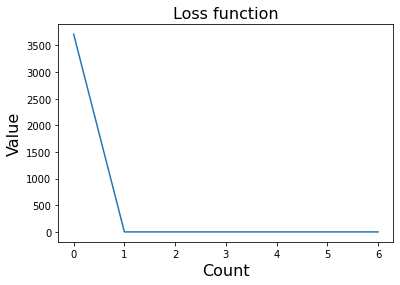

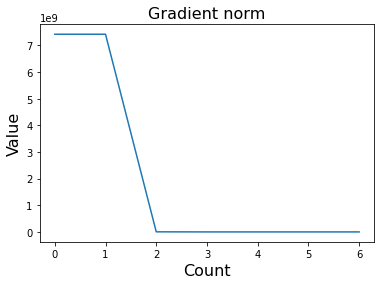

count: 6, gradient norm: 9.538231946597232e-07, loss func: 1.490289920953216e-20


In [7]:
lm = reg.RegressionOpt(
    solver='gd',
    max_iter=500,
    w=w_init,
    step_size=2.33e-12,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

w = lm.fit_gd()

plot_data(lm)

# save_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

Newton method

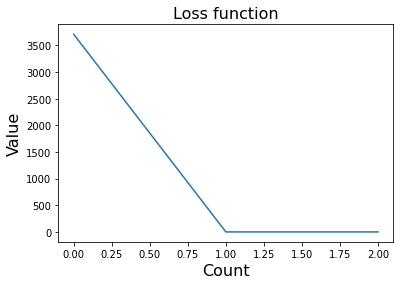

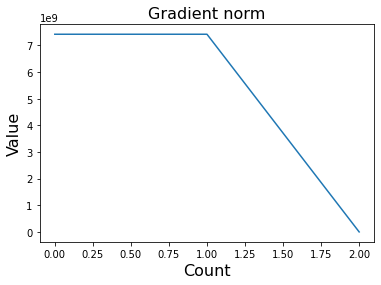

count: 2, gradient norm: 1.3645380800150865e-12, loss func: 4.9002225110025143e-26


In [8]:
lm = reg.RegressionOpt(
    solver='newton',
    max_iter=500,
    step_size=1,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

lm.fit_newton()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)
# save_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

Accelerated GD method

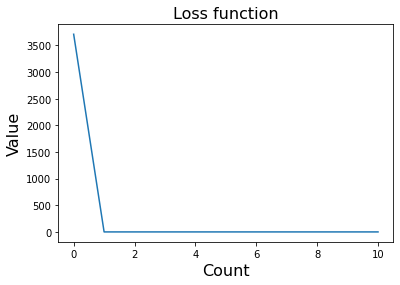

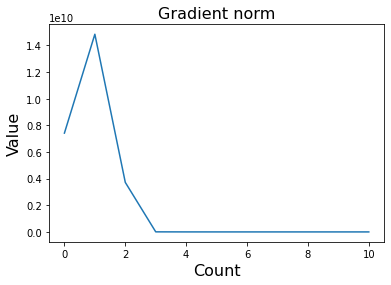

count: 11, gradient norm: 2.3841863896735003e-05, loss func: 1.490289920953216e-20


In [9]:
import regression as reg

lm = reg.RegressionOpt(
    solver='agd',
    max_iter=500,
    step_size=2.33e-12,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

lm.fit_acc_gd()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)
# save_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

In [10]:
delta = 1e-14
t0 = 2e-12
t = []
for i in range(100):
    t.append(t0 + i * delta)

for step in t:
    lm = reg.RegressionOpt(
    solver='gd',
    max_iter=500,
    step_size=step,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
    )

    lm.fit_gd()

    print(f'step size: {step}, count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')


step size: 2e-12, count: 18, gradient norm: 2.574921202780232e-05, loss function: 1.49028845883276e-20
step size: 2.01e-12, count: 18, gradient norm: 1.6212472108105498e-05, loss function: 1.4902909935784822e-20
step size: 2.02e-12, count: 17, gradient norm: 6.866455281987762e-05, loss function: 1.4902890626938134e-20
step size: 2.03e-12, count: 17, gradient norm: 4.005432480444523e-05, loss function: 1.4902888045927386e-20
step size: 2.0399999999999998e-12, count: 17, gradient norm: 2.288818976805672e-05, loss function: 1.4902909935784822e-20
step size: 2.05e-12, count: 17, gradient norm: 1.3351451036010425e-05, loss function: 1.4902909935784822e-20
step size: 2.06e-12, count: 16, gradient norm: 6.389618139204716e-05, loss function: 1.4902904084385272e-20
step size: 2.07e-12, count: 16, gradient norm: 3.7193302128599185e-05, loss function: 1.49028845883276e-20
step size: 2.08e-12, count: 16, gradient norm: 2.0027167706523456e-05, loss function: 1.4902909935784822e-20
step size: 2.0899

GD with backtracking

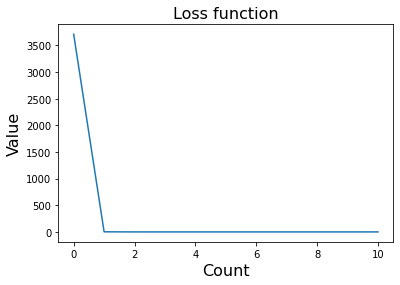

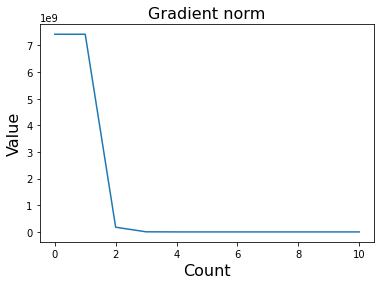

count: 10, inner_count: 421, gradient norm: 1.811981981933273e-05, loss func: 1.4902890626938134e-20


In [11]:
import regression as reg

lm = reg.RegressionOpt(
    backtracking=True,
    max_iter=500,
    step_size=10,
    alpha=0.5,
    beta=0.5,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

lm.fit_gd()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)

print(f'count: {lm.count}, inner_count: {lm.inner_count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

Accelerated GD with backtracking

In [12]:
# import regression as reg
#
# t = [4e-13]
# for i in range(25):
#     t.append(1.01 * t[i])
#
# # print(t)
#
# for step in t:
#     lm = reg.RegressionOpt(
#         backtracking=True,
#         max_iter=500,
#         step_size=step,
#         alpha=0.5,
#         beta=0.5,
#         w=w_init,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         terminate=True
#     )
#
#     lm.fit_acc_gd()
#     # plot_data(lm)
#
#     print(f'step size: {step}, count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')

In [83]:
lm = reg.RegressionOpt(
    solver='agd_bt',
    backtracking=True,
    max_iter=50,
    step_size=6.25158e-4,
    alpha=0.5,
    beta=0.5,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

lm.fit_acc_gd()
# plot_data(lm)
# save_data(lm)

print(f'step size: {lm.step_size}, count: {lm.count}, inner_count: {lm.inner_count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')

step size: 0.000625158, count: 12, inner_count: 309, gradient norm: 4.959106734855191e-05, loss function: 1.4913239905259186e-20


In [98]:
delta = 1e-11
t0 = 6.251678e-4
t = []
for i in range(50):
    t.append(t0 + i * delta)
loop = 0
for step in t:
    loop += 1
    lm = reg.RegressionOpt(
    solver='agd_bt',
    backtracking=True,
    max_iter=50,
    step_size=step,
    alpha=0.5,
    beta=0.5,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
    )

    lm.fit_acc_gd()
    # plot_data(lm)
    # save_data(lm)

    print(f'loop: {loop}, step size: {lm.step_size}, count: {lm.count}, inner_count: {lm.inner_count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')

loop: 1, step size: 0.0006251678, count: 12, inner_count: 308, gradient norm: 3.814734547077766e-06, loss function: 1.4913148691236104e-20
loop: 2, step size: 0.00062516781, count: 12, inner_count: 308, gradient norm: 3.814734547077766e-06, loss function: 1.4913147797021824e-20
loop: 3, step size: 0.00062516782, count: 12, inner_count: 308, gradient norm: 3.814734547077766e-06, loss function: 1.491315182176522e-20
loop: 4, step size: 0.00062516783, count: 12, inner_count: 308, gradient norm: 3.814734547077766e-06, loss function: 1.4913149046491216e-20
loop: 5, step size: 0.0006251678399999999, count: 12, inner_count: 308, gradient norm: 3.814734547077766e-06, loss function: 1.4913149046491216e-20
loop: 6, step size: 0.00062516785, count: 12, inner_count: 308, gradient norm: 3.814734547077766e-06, loss function: 1.49131505718598e-20
loop: 7, step size: 0.00062516786, count: 13, inner_count: 337, gradient norm: 3.814734547077766e-06, loss function: 1.4913150922979553e-20
loop: 8, step si

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
# lm.coef_
print(f'train score: {lm.score(X_train, y_train)}')
print(f'test score: {lm.score(X_test, y_test)}')

train score: 1.0
test score: 1.0
